Import Libraries

In [ ]:
#pip install termcolor

In [1]:
#Data Exploration libraries
import numpy as np
import pandas as pd
import scipy

#These are the visualization libraries
#Seaborn works on top of matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


#Advanced tools
import itertools

#For standardizing features. for this project StandardScaler module will be used
from sklearn.preprocessing import StandardScaler
#Hierarchical clustering with the Sci Py library. With the dendrogram and linkage modules
from scipy.cluster.hierarchy import dendrogram, linkage
 # The k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Pickle will be needed to save the models
import pickle

Import data

In [2]:
# Loading the data, contained in the Customer Segmentation data csv file.
df_Customer_Segmentation = pd.read_csv('C:\\Users\\User\\Documents\\data_box\\Customer data.csv')


In [3]:
#Exploring the first 10 data points of the data sets
df_Customer_Segmentation.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [4]:
#Exploring the shape of the data
df_Customer_Segmentation.shape

(2000, 8)

In [5]:
df_Customer_Segmentation.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Correlation Estimate 

In [6]:
# Computting Pearson correlation coefficient for the features in our data set.
df_Customer_Segmentation.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


Visualization using Heat Map below.
I've visualized using different themes in the heatmap features feel free to pick anyone that suits your fancy

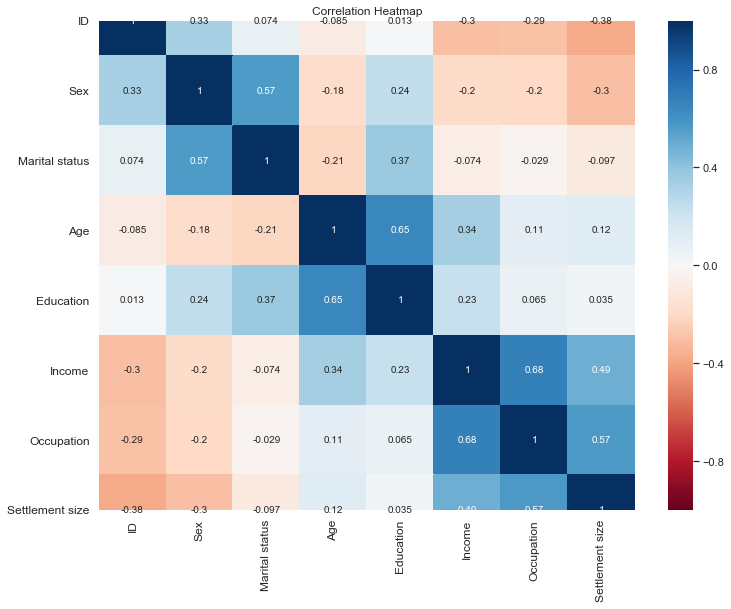

In [7]:
# A plot of the correlations using a Heat Map. Heat Maps are a great way to visualize correlations using color coding.
# I'll use RdBu as a color scheme, and also use viridis, Blues, and YlGnBu .
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_Customer_Segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

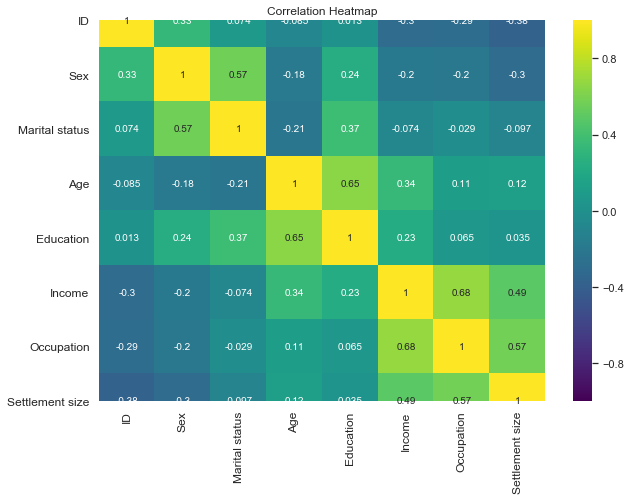

In [53]:
# A plot of the correlations using a Heat Map. Heat Maps are a great way to visualize correlations using color coding.
# I'll use  viridis as a color scheme, and also use , Blues, and YlGnBu as I've used RdBu in the previous cell.
plt.figure(figsize = (10, 7))
s = sns.heatmap(df_Customer_Segmentation.corr(),
               annot = True, 
               cmap = 'viridis',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

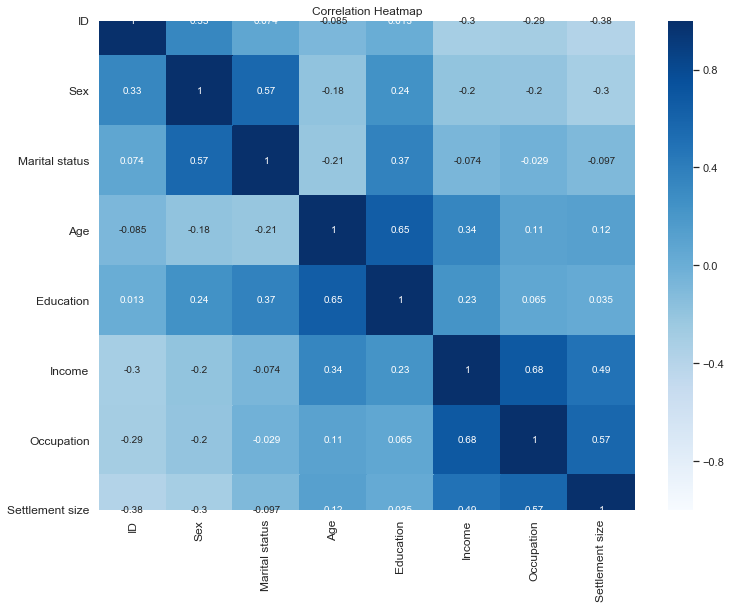

In [9]:
# A plot of the correlations using a Heat Map. Heat Maps are a great way to visualize correlations using color coding.
# I'll use  Blues as a color scheme, and also use and YlGnBu as I've used RdBu,and Viridis in the previous cells.
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_Customer_Segmentation.corr(),
               annot = True, 
               cmap = 'Blues',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

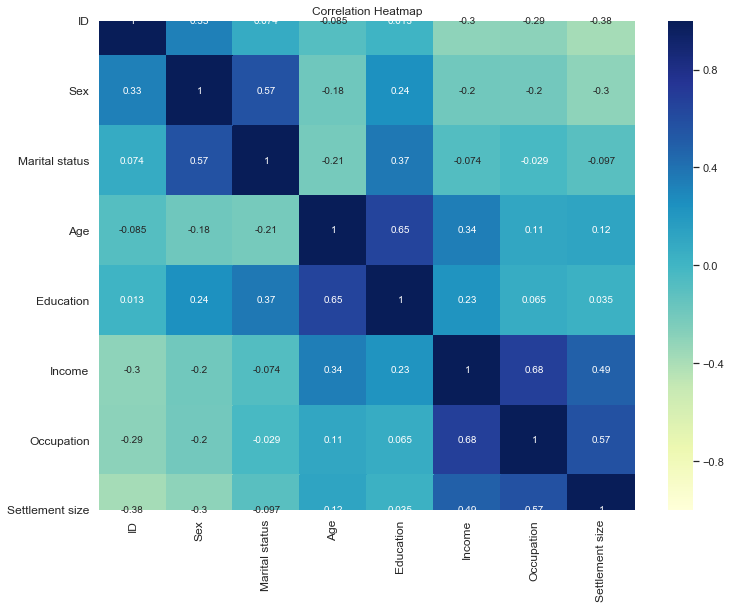

In [10]:
# A plot of the correlations using a Heat Map. Heat Maps are a great way to visualize correlations using color coding.
# I'll use  YlGnBu as a color scheme,as I've used RdBu,Viridis,and Blues in the previous cells.
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_Customer_Segmentation.corr(),
               annot = True, 
               cmap = 'YlGnBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()


Standardization

In [11]:
#Using standardization techniques in order to tackle data bias 
# choice for Standardization is because of the Distance - Based Algorithms we will be using.
scaler = StandardScaler()
Customer_Segmentation_std = scaler.fit_transform(df_Customer_Segmentation)

In [12]:
# When an Hierarchical Clustering is performed. The results will be a linkage matrix. 
hier_clust = linkage(Customer_Segmentation_std, method = 'ward')

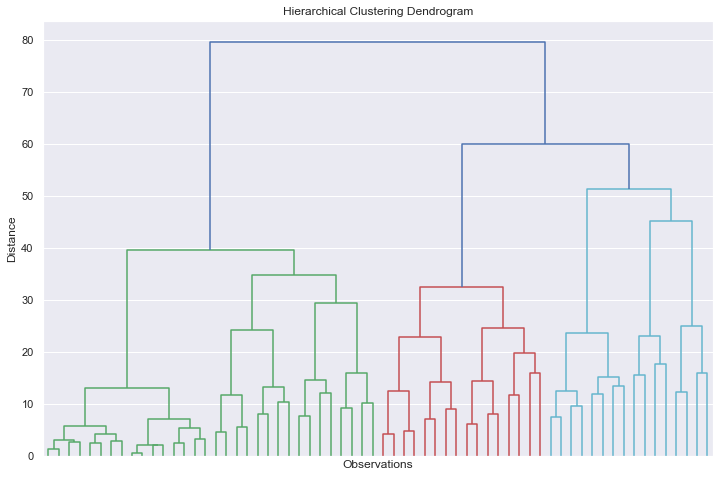

In [55]:
# plotting the results from the Hierarchical Clustering using a Dendrogram. 

plt.figure(figsize = (12,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

𝐊-𝐦𝐞𝐚𝐧𝐬 𝐂𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠

In [14]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Customer_Segmentation_std)
    wcss.append(kmeans.inertia_)

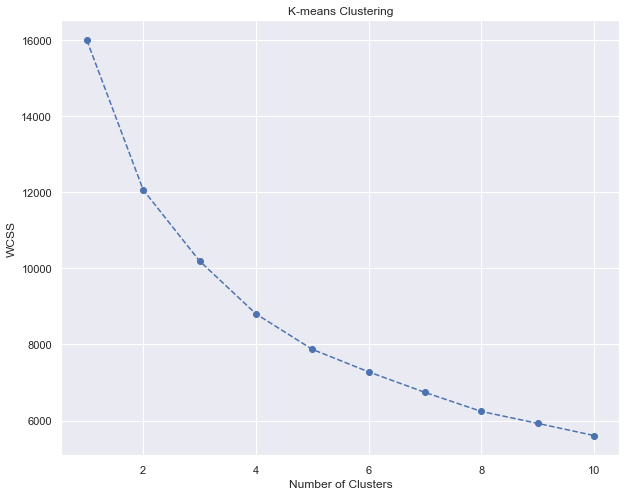

In [15]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [16]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [17]:
# Dividing the data into the four clusters.
kmeans.fit(Customer_Segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [18]:
# creating a new data frame with the existing features and add a new column with the assigned clusters for each point.
df_Customer_Segm_kmeans = df_Customer_Segmentation.copy()
df_Customer_Segm_kmeans['Segment K-means'] = kmeans.labels_

In [19]:
# Calculate mean values for the clusters
df_Customer_Segm_analysis = df_Customer_Segm_kmeans.groupby(['Segment K-means']).mean()
df_Customer_Segm_analysis

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,,
0,1.000011e+08,0.876289,0.998527,29.002946,1.067747,105597.536082,0.630339,0.418262
1,1.000007e+08,0.030063,0.178797,35.632911,0.737342,139944.602848,1.250000,1.387658
2,1.000014e+08,0.403341,0.042959,34.689737,0.742243,94407.322196,0.255370,0.059666
3,1.000009e+08,0.485185,0.681481,55.814815,2.125926,156320.200000,1.096296,1.081481


In [20]:
# Compute the size and proportions of the four clusters
df_Customer_Segm_analysis['Num of Obs'] = df_Customer_Segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_Customer_Segm_analysis['Prop of Obs'] = df_Customer_Segm_analysis['Num of Obs'] / df_Customer_Segm_analysis['Num of Obs'].sum()

In [21]:
df_Customer_Segm_analysis.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Num of Obs,Prop of Obs
Segment K-means,,,,,,,,,,
0,1.000011e+08,0.876289,0.998527,29.002946,1.067747,105597.536082,0.630339,0.418262,679,0.3395
1,1.000007e+08,0.030063,0.178797,35.632911,0.737342,139944.602848,1.250000,1.387658,632,0.3160
2,1.000014e+08,0.403341,0.042959,34.689737,0.742243,94407.322196,0.255370,0.059666,419,0.2095
3,1.000009e+08,0.485185,0.681481,55.814815,2.125926,156320.200000,1.096296,1.081481,270,0.1350


In [22]:
df_Customer_Segm_analysis.rename({0:'better-off',
                         1:'fewer-opportunities',
                         2:'standard Living',
                         3:'career oriented'})

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Num of Obs,Prop of Obs
Segment K-means,,,,,,,,,,
better-off,1.000011e+08,0.876289,0.998527,29.002946,1.067747,105597.536082,0.630339,0.418262,679,0.3395
fewer-opportunities,1.000007e+08,0.030063,0.178797,35.632911,0.737342,139944.602848,1.250000,1.387658,632,0.3160
standard Living,1.000014e+08,0.403341,0.042959,34.689737,0.742243,94407.322196,0.255370,0.059666,419,0.2095
career oriented,1.000009e+08,0.485185,0.681481,55.814815,2.125926,156320.200000,1.096296,1.081481,270,0.1350


In [23]:
# Adding the segment labels to our table
df_Customer_Segm_kmeans['Labels'] = df_Customer_Segm_kmeans['Segment K-means'].map({0:'better-off', 
                                                                  1:'fewer-opportunities',
                                                                  2:'standard Living', 
                                                                  3:'career oriented'})

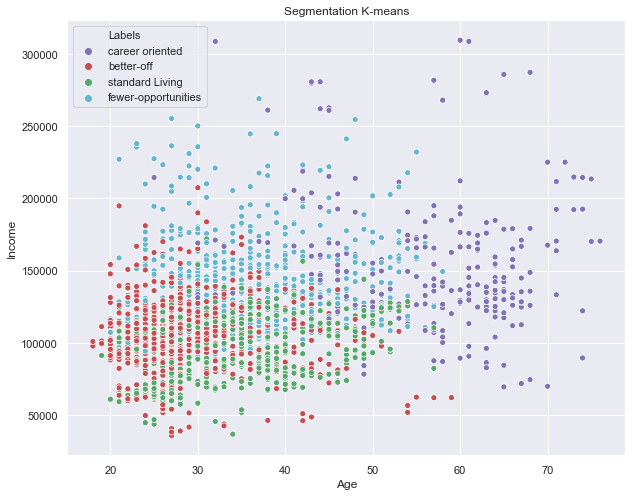

In [24]:
# plotting the results from the K-means algorithm. 
x_axis = df_Customer_Segm_kmeans['Age']
y_axis = df_Customer_Segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_Customer_Segm_kmeans['Labels'], palette = ['m', 'r', 'g', 'c'])
plt.title('Segmentation K-means')
plt.show()

𝐏𝐂𝐀

In [25]:
# Using PCA to find a subset of components.
pca = PCA()

In [26]:
# Fitting PCA with our standardized data.
pca.fit(Customer_Segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
# These attributes shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.34103573, 0.23178599, 0.16650585, 0.09955452, 0.06169548,
       0.04785186, 0.03407515, 0.01749541])

In [28]:
# We can choose three components. 
pca = PCA(n_components = 3)

In [29]:
#Fitting the model of the data with the selected number of components previously selected in the cell above.
pca.fit(Customer_Segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

𝐏𝐂𝐀 𝐑𝐞𝐬𝐮𝐥𝐭𝐬

In [30]:
# we can discucss the results from the PCA here.
pca.components_

array([[-0.34541048, -0.32858553, -0.18726934,  0.27028302,  0.10451468,
         0.48384405,  0.46168136,  0.45433728],
       [ 0.10723681,  0.4213196 ,  0.47208337,  0.35525956,  0.65278586,
         0.17628427,  0.06136181, -0.0307768 ],
       [ 0.14352194, -0.31795888, -0.4854334 ,  0.61344196,  0.25225754,
        -0.12360121, -0.34456626, -0.26212582]])

In [31]:
df_Pca_Comp = pd.DataFrame(data = pca.components_,
                           columns = df_Customer_Segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_Pca_Comp

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.345410,-0.328586,-0.187269,0.270283,0.104515,0.483844,0.461681,0.454337
Component 2,0.107237,0.421320,0.472083,0.355260,0.652786,0.176284,0.061362,-0.030777
Component 3,0.143522,-0.317959,-0.485433,0.613442,0.252258,-0.123601,-0.344566,-0.262126


([<matplotlib.axis.YTick at 0x21b623fb848>,
 <a list of 3 Text yticklabel objects>)

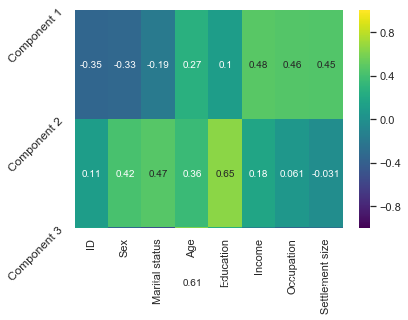

In [59]:
# Heat Map for Principal Components against existing features. 
# Here the RdBu color scheme will be used and set borders to -1 and 1.
sns.heatmap(df_Pca_Comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'viridis',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)

In [33]:
pca.transform(Customer_Segmentation_std)

array([[ 2.85978214,  0.93667597,  2.03658632],
       [ 0.94413038,  0.39449213, -2.43378502],
       [-0.02303213, -0.8817974 ,  1.97408269],
       ...,
       [-1.84179778, -2.15868138,  1.1160118 ],
       [-2.71683211,  0.56139001, -0.4762533 ],
       [-2.2097949 , -2.42344957,  0.86070907]])

In [34]:
Scores_Pca = pca.transform(Customer_Segmentation_std)

𝐊-𝐦𝐞𝐚𝐧𝐬 𝐜𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠 𝐰𝐢𝐭𝐡 𝐏𝐂𝐀

In [36]:
# fitting K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(Scores_Pca )
    wcss.append(kmeans_pca.inertia_)

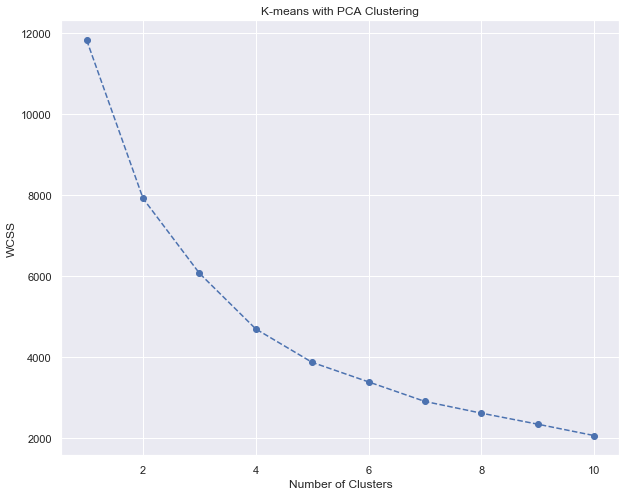

In [37]:
# Plotting the Within Cluster Sum of Squares for the K-means PCA model. 
# wecan make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [38]:
# With the chosen four clusters, then running the K-means with number of clusters equals four. 
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [40]:
# fitting the data with the k-means pca model
kmeans_pca.fit(Scores_Pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

𝐊-𝐦𝐞𝐚𝐧𝐬 𝐜𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠 𝐰𝐢𝐭𝐡 𝐏𝐂𝐀 𝐑𝐞𝐬𝐮𝐥𝐭𝐬

In [43]:
# Creating a new data frame with the existing features and add the PCA scores and assigned clusters.
df_Segm_Pca_kmeans = pd.concat([df_Customer_Segmentation.reset_index(drop = True), pd.DataFrame(Scores_Pca)], axis = 1)
df_Segm_Pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column added contains the pca k-means clustering labels.
df_Segm_Pca_kmeans['Segmented K-means PCA'] = kmeans_pca.labels_

In [44]:
df_Segm_Pca_kmeans

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segmented K-means PCA
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,2.036586,1
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,-2.433785,2
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,1.974083,3
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,0.635332,2
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,1.127543,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-1.485348,0.432286,1.615196,3
1996,100001997,1,1,27,1,117744,1,0,-1.672129,0.839600,-0.923547,0
1997,100001998,0,0,31,0,86400,0,0,-1.841798,-2.158681,1.116012,3
1998,100001999,1,1,24,1,97968,0,0,-2.716832,0.561390,-0.476253,0


In [45]:
# Calculating the means by segments.
df_Segm_Pca_kmeans_freq = df_Segm_Pca_kmeans.groupby(['Segmented K-means PCA']).mean()
df_Segm_Pca_kmeans_freq

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segmented K-means PCA,,,,,,,,,,,
0,1.000012e+08,0.919040,0.967016,28.958021,1.064468,106617.467766,0.659670,0.427286,-1.205155,0.616021,-0.833262
1,1.000009e+08,0.492537,0.679104,55.873134,2.130597,156430.727612,1.097015,1.082090,1.483593,2.152720,0.893411
2,1.000007e+08,0.036278,0.194006,35.466877,0.739748,140435.219243,1.255521,1.394322,1.471999,-0.935925,-0.187509
3,1.000013e+08,0.338747,0.099768,34.902552,0.756381,92426.039443,0.211137,0.044084,-1.222765,-0.915172,1.009819


In [49]:
# Calculating the size of each cluster and its proportion to the entire data set.
df_Segm_Pca_kmeans_freq['Num of Obs'] = df_Segm_Pca_kmeans[['Segmented K-means PCA','Sex']].groupby(['Segmented K-means PCA']).count()
df_Segm_Pca_kmeans_freq['Prop of Obs'] = df_Segm_Pca_kmeans_freq['Num of Obs'] / df_Segm_Pca_kmeans_freq['Num of Obs'].sum()
df_Segm_Pca_kmeans_freq = df_Segm_Pca_kmeans_freq.rename({0:'standard living', 
                                                          1:'career oriented',
                                                          2:'fewer opportunities', 
                                                          3:'better-off'})
df_Segm_Pca_kmeans_freq

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Num of Obs,Prop of Obs
Segmented K-means PCA,,,,,,,,,,,,,
standard living,1.000012e+08,0.919040,0.967016,28.958021,1.064468,106617.467766,0.659670,0.427286,-1.205155,0.616021,-0.833262,667,0.3335
career oriented,1.000009e+08,0.492537,0.679104,55.873134,2.130597,156430.727612,1.097015,1.082090,1.483593,2.152720,0.893411,268,0.1340
fewer opportunities,1.000007e+08,0.036278,0.194006,35.466877,0.739748,140435.219243,1.255521,1.394322,1.471999,-0.935925,-0.187509,634,0.3170
better-off,1.000013e+08,0.338747,0.099768,34.902552,0.756381,92426.039443,0.211137,0.044084,-1.222765,-0.915172,1.009819,431,0.2155


In [51]:
df_Segm_Pca_kmeans['Legend'] = df_Segm_Pca_kmeans['Segmented K-means PCA'].map({0:'standard living', 
                                                          1:'career oriented',
                                                          2:'fewer opportunities', 
                                                          3:'better-off'})

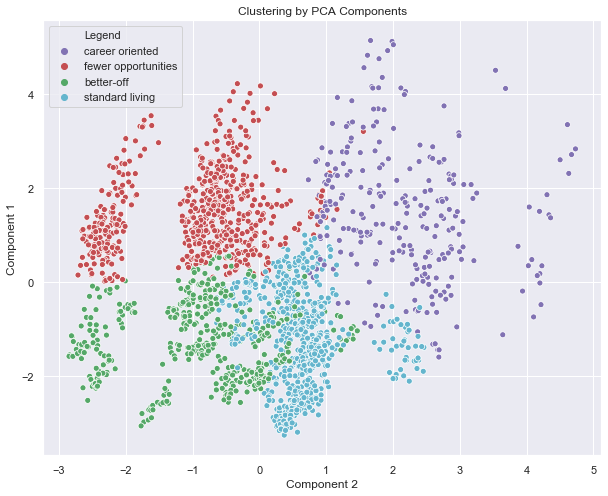

In [52]:
# Plotting data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_Segm_Pca_kmeans['Component 2']
y_axis = df_Segm_Pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_Segm_Pca_kmeans['Legend'], palette = ['m', 'r', 'g', 'c'])
plt.title('Clustering by PCA Components')
plt.show()

𝐃𝐚𝐭𝐚 𝐄𝐱𝐩𝐨𝐫𝐭

In [ ]:
# Recall while importing the libraries; 'Pickle will be needed to save the models'
# There might be need for scaler, pca and kmeans_pca objects to preprocess and segment the data set incase of further analytics.
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [ ]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [ ]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))